In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import os
# os.environ["QISKIT_IN_PARALLEL"] = 'TRUE'

In [3]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["font.size"] = 16

from qiskit import QuantumCircuit, IBMQ, schedule
import qiskit.pulse as pulse
from qiskit.quantum_info.states import Statevector, DensityMatrix
from qiskit_dynamics import Solver, Signal
from qiskit_dynamics.pulse import InstructionToSignals
from qiskit.providers import BackendV2, QubitProperties
from qiskit.providers.options import Options
from qiskit.transpiler import Target

from qiskit.providers.models import PulseDefaults
from qiskit.qobj.pulse_qobj import PulseLibraryItem, PulseQobjInstruction
from qiskit.providers.models.pulsedefaults import Command

from qiskit_experiments.exceptions import QiskitError

In [4]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
backend = provider.get_backend("ibmq_manila")

In [6]:
# from qiskit_experiments.test.pulse_backend import SingleTransmonTestBackend, ParallelTransmonTestBackend
# pulse_backend = ParallelTransmonTestBackend(noise=False) 
# pulse_backend1 = SingleTransmonTestBackend(noise=False)

In [7]:
# from qiskit_experiments.data_processing.discriminator import BaseDiscriminator

# class FakeDiscriminator(BaseDiscriminator):
#     """A fake discriminator class for testing."""

#     def predict(self, data):
#         """Discriminate the data"""
#         return ["1" if iq[0] > iq[1] else "0" for iq in data]

#     def config(self):
#         """Config method."""
#         return {}

#     def is_trained(self):
#         """This test discriminator is always trained."""
#         return True

# pulse_backend.discriminator = FakeDiscriminator()

In [5]:
import numpy as np

from qiskit_experiments.calibration_management.calibrations import Calibrations
from qiskit_experiments.calibration_management.basis_gate_library import (
    FixedFrequencyTransmon,
)
# from qiskit_experiments.test.pulse_backend import ParallelTransmonTestBackend, SingleTransmonTestBackend
# pulse_backend = ParallelTransmonTestBackend(noise=False)
# pulse_backend1 = SingleTransmonTestBackend(noise=False)
# qubit = 0
library = FixedFrequencyTransmon()
cals = Calibrations.from_backend(backend, libraries=[library])

In [6]:
# cals.add_parameter_value(320,'duration',(),schedule='x')

In [7]:
from qiskit_experiments.library.calibration import RoughXSXAmplitudeCal

rabi0 = RoughXSXAmplitudeCal(
    0, cals, backend=backend, amplitudes=np.linspace(-0.1, 0.1, 55)
)

rabi1 = RoughXSXAmplitudeCal(
    1, cals, backend=backend, amplitudes=np.linspace(-0.1, 0.1, 55)
)

In [8]:
from qiskit_experiments.framework.composite import ParallelExperiment

In [9]:
rabi_parallel = ParallelExperiment([rabi0,rabi1],backend=backend)

In [15]:
rabi_data = rabi_parallel.run(shots=4000, meas_level=2)#.block_for_results()

/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/framework/composite/composite_experiment.py:168: UserWarning: Component 0 RoughXSXAmplitudeCal experiment run options ['meas_return'] values ['single'] will be overridden with ParallelExperiment values [None].
  warnings.warn(
/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/framework/composite/composite_experiment.py:168: UserWarning: Component 1 RoughXSXAmplitudeCal experiment run options ['meas_return'] values ['single'] will be overridden with ParallelExperiment values [None].
  warnings.warn(


In [16]:
rabi_data.job_ids

['636d541ccfd60271480db038']

In [11]:
from qiskit_experiments.framework import ExperimentData

In [12]:
rabi_data = ExperimentData(backend=backend)
rabi_data.add_jobs([backend.retrieve_job("636d541ccfd60271480db038")])
rabi_parallel.analysis.run(rabi_data)

ExperimentData(None, d06bb323-6ff4-4f1a-87e7-d2702ba5f9a5, job_ids=['636d541ccfd60271480db038'], metadata=<3 items>)

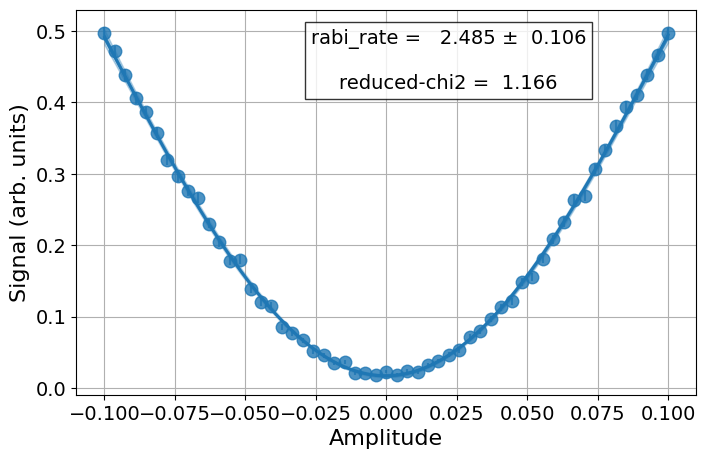

In [44]:
rabi_data.child_data()[1]._figures['None_Fig-0_Exp-7857ce68.svg']



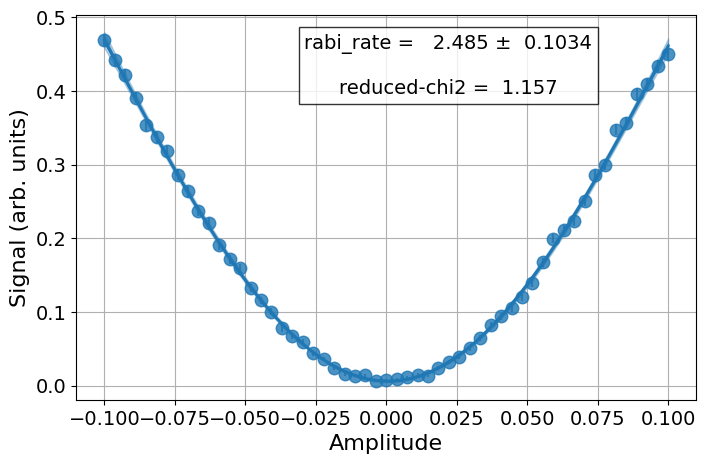

In [40]:
rabi_data.child_data()[0]._figures['None_Fig-0_Exp-3e2a53c3.svg']


In [5]:
job = backend.retrieve_job("636d541ccfd60271480db038")

In [6]:
job.result()


Result(backend_name='ibmq_manila', backend_version='1.1.0', qobj_id='c86fd0c2-1cf4-4c68-9724-8a1e04b4be26', job_id='636d541ccfd60271480db038', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1087, '0x1': 924, '0x2': 1035, '0x3': 954}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c55', 0]], creg_sizes=[['c0', 1], ['c55', 1]], global_phase=0.0, memory_slots=2, metadata={'experiment_type': 'ParallelExperiment', 'composite_index': [0, 1], 'composite_metadata': [{'experiment_type': 'RoughXSXAmplitudeCal', 'qubits': [0], 'xval': -0.1, 'unit': 'arb. unit', 'amplitude': -0.1}, {'experiment_type': 'RoughXSXAmplitudeCal', 'qubits': [1], 'xval': -0.1, 'unit': 'arb. unit', 'amplitude': -0.1}], 'composite_qubits': [[0], [1]], 'composite_clbits': [[0], [1]]}, n_qubits=5, name='parallel_exp_0', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), status=done), ExperimentResult(shots

In [20]:
rabi_data._result_data.__dict__#result().results[17].data

{'_lock': <unlocked _thread.RLock object owner=0 count=0 at 0x7fa3c0a8a060>,
 '_container': [{'counts': {'0 0': 1087, '0 1': 924, '1 0': 1035, '1 1': 954},
   'job_id': '636d541ccfd60271480db038',
   'metadata': {'experiment_type': 'ParallelExperiment',
    'composite_index': [0, 1],
    'composite_metadata': [{'experiment_type': 'RoughXSXAmplitudeCal',
      'qubits': [0],
      'xval': -0.1,
      'unit': 'arb. unit',
      'amplitude': -0.1},
     {'experiment_type': 'RoughXSXAmplitudeCal',
      'qubits': [1],
      'xval': -0.1,
      'unit': 'arb. unit',
      'amplitude': -0.1}],
    'composite_qubits': [[0], [1]],
    'composite_clbits': [[0], [1]]},
   'shots': 4000,
   'meas_level': 2},
  {'counts': {'0 0': 1178, '0 1': 936, '1 0': 1056, '1 1': 830},
   'job_id': '636d541ccfd60271480db038',
   'metadata': {'experiment_type': 'ParallelExperiment',
    'composite_index': [0, 1],
    'composite_metadata': [{'experiment_type': 'RoughXSXAmplitudeCal',
      'qubits': [0],
      'x

In [17]:
# data = np.array(rabi_data._jobs[0].result().results[17].data.memory)#.meas_level

In [18]:
# rabi_data._jobs[0].result().results[17].data

In [19]:
# rabi_data.child_data()[0].figure(0)

In [20]:
# rabi_data.child_data()[0].data()

In [27]:
# rabi_data.figure(0)

In [28]:
# # plt.scatter(*data[:,0].T)
# plt.scatter(*data[:,1].T)
# plt.plot(np.arange(-1,1.5,0.01), np.arange(-1,1.5,0.01))

In [29]:
# rabi_data.analysis_results(0).value.params["freq"]

In [30]:
# print(rabi_data.analysis_results("rabi_rate"))

In [31]:
# cals.get_schedule("sx", qubit)

In [32]:
# cals.get_schedule("x", qubit)